# Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
#import urllib.request

from sklearn import datasets, linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Загрузка данных

In [2]:
df = pd.read_csv('datasets/insurance.csv')

In [4]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посмотрим на общую информация о датасете:

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [6]:
df.isna().mean()

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

Пропусков в данных нет

In [7]:
df.duplicated().sum()

153

Явных дубликатов - 153 строки. На цель проета данные дубликаты не влияют, поэтому удалять их нет необходимости.

Посмотрим, если в данных признаки с очень сильными взаимосвязями между собой:

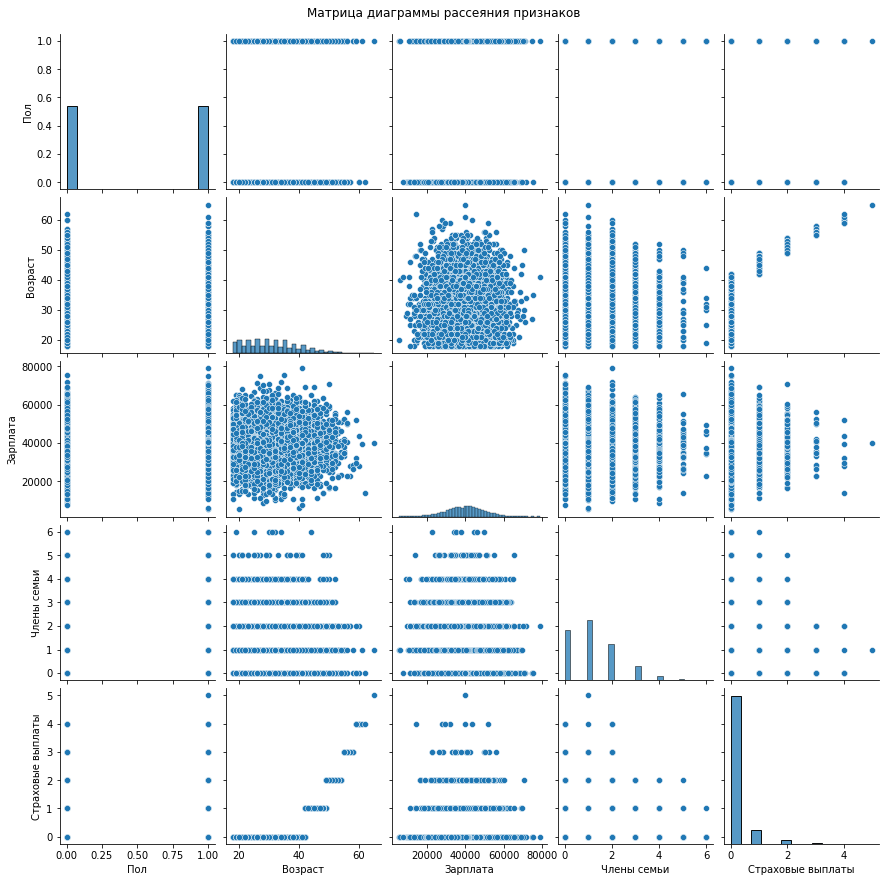

In [8]:
sns.pairplot(df)
plt.suptitle("Матрица диаграммы рассеяния признаков")
plt.subplots_adjust(top=0.95)
plt.show()

In [9]:
df.describe() #статистические данные 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [10]:
df.corr() 

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


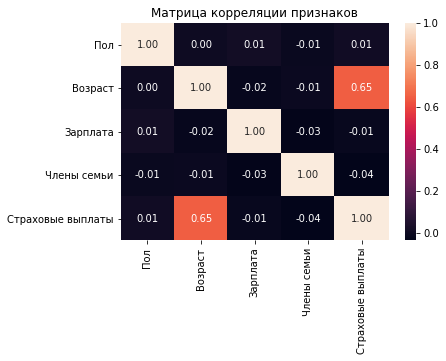

In [11]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Матрица корреляции признаков")
plt.show()

Между признаками линейные взаимосвязи отсутсвуют. На целевой признак - страховые выплаты - сильнее всего влияет возраст, на матрице рассеивания видно, что с увеличением возраста растут и страховые выплаты, что вполне логично.

# Умножение матриц

Формулы линейной регрессии:

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

В этом пункте необходимо проверить как изменится качество модели линейной регрессии, если признаки умножить на необратимую матрицу, поэтому для этого пункта использовать разделение не будем, а посмотрим общую оценку для всех данных.

Определим целевой признак и фичи:

In [12]:
df_features = df.drop('Страховые выплаты', axis=1)
df_target = df['Страховые выплаты']

Вычеслим оценку r2 (коэффициент детерминации) модели, обученной на доступных фичах

In [13]:
model_1 = LinearRegression()
model_1.fit(df_features, df_target)
predictions = model_1.predict(df_features)
score = round(r2_score(df_target, predictions), 5)
#print('Коэффициенты w для модели №1', model_1.coef_)
#model_1.intercept_

Обратам датасет с признаками в матрицу:

In [14]:
df_features_matrix = df_features.values

In [15]:
df_features_matrix.shape

(5000, 4)

Создадим обратимую матрицу:

In [16]:
np.random.seed(123) #слуайные числа, сгенирированные NumPy будут одинаковыми при повторном запуске кода
random_matrix = np.random.rand(4, 4) #сгенирируем случайную матрицу, длинна которой равна ширине матрицы df_features_matrix

Умножим признаки на обратимую матрицу:

In [17]:
new_df_features = df_features_matrix.dot(random_matrix)
new_df_features.shape

(5000, 4)

Проверим, изменилось ли качество линейной регресии:

In [18]:
model_2 = LinearRegression()
model_2.fit(new_df_features, df_target)
predictions = model_2.predict(new_df_features)
new_score = round(r2_score(df_target, predictions), 5)

In [19]:
if score == new_score:
    print('При умножении признаков на обратимую матрицу качество модели не изменится')
    print('score = new_score:', score)
else:
    print('При умножении признаков на обратимую матрицу качество модели изменится')
    print('score =', score)
    print('new_score =', new_score)

При умножении признаков на обратимую матрицу качество модели не изменится
score = new_score: 0.42495


# Алгоритм преобразования

## Алгоритм

Алгоритм - это определенный способ шифровки информации (список инструкций). В данном случае необходимо зашифровать данные о клиентах, их возраст, пол, заработную плату. Все данные о клиентах представляют собой матрицу 5000 на 4, ключ шифрования - обратимая квадратная матрица 4 на 4. Для получения зашифрованной информации о клиенте необходимо ключ умножить на матрицу с данными. 

В дальнейшем, расшифровать данные можно с помощью обратной матрицы ключа шифрования.  

## Обоснование

Обоснование, почему качество модели линейной регрессии не меняется:

Выше уже приведены формулы, которые модель использует для предсказаний и для вектора коэфициентов $w$, который модель использует для обучения. Когда мы умножаем признаки на обратимую матрицу, получаем следующую формулу:

$$ F = XA $$

где $F$ - новая матрица, полученная в результате умножения признаков $X$ на обратимую матрицу $A$

В результате мы получаем новый набор коэффициентов $w`$, которые хотим оценить:
$$
w` = (F^T F)^{-1} F^T y
$$
или:
$$
w` = ((X A)^T (XA))^{-1} (X A)^T y =
$$

$$
(A^T X^T XA)^{-1} A^T X^T y =
$$

$$
 A^{-1}(X^T X)^{-1} (A^T)^{-1}A^TX^T y =
$$

$$
A^{-1}(X^T X)^{-1} EX^T y = 
$$

$$
A^{-1}(X^T X)^{-1} X^T y = A^{-1} w
$$

где $E$ - это единичная матрица, получившаяся в результате произведения квадратной матрицы $A^T$ на ее обратную матрицу $(A^T)^{-1}$.

Следовательно: $$w` =  A^{-1} w$$

то есть новые веса $w`$ - это старые веса $w$, умноженные на обратную случайную матрицу.

В итоге мы получаем новые предсказания $a`$ для модели линейной регрессии, формулу которых можно записать так:
$ a` = Fw`$ или $a` = XA A^{-1}w$

$$a` = XE w = Xw = a$$

Предсказания модели, умноженной на случайную матрицу А равны предсказаниям модели до умножения на случайную матрицу.

Таким образом, умножение признаков на обратимую матрицу не меняет линейной зависимости между признаками, поэтому качество модели линейной регрессии остается прежним. Однако коэффициенты в модели будут другими, так как теперь они оцениваются на основе нового набора признаков F.




# Проверка алгоритма

Разделим выборки для обучения и теста:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.25, random_state=42)

Найдем размерность признаков для случайной матрицы:

In [21]:
n_features = df_features.shape[1]

Запишем алгоритм действий:

In [22]:
#генерация секретного ключа
secret_key = np.random.rand(n_features,n_features) 

#генерация матриц с данными
X_train_matrix = X_train.values
X_test_matrix = X_test.values

# шифруем данные с помощью секретного ключа
train_secret_matrix = np.dot(X_train_matrix, secret_key)
test_secret_matrix = np.dot(X_test_matrix, secret_key)

# расшифровываем данные с помощью обратной матрицы секретного ключа
de_train = np.dot(train_secret_matrix, np.linalg.inv(secret_key))
de_test = np.dot(test_secret_matrix, np.linalg.inv(secret_key))

Проверка случайной матрицы на обратимость:

Дана случайная матрица . Если обратная к ней матрица существует, то определитель исходной матрицы отличен от нуля:
$$ |A|≠0$$

вычислим определитель массива с помощью **numpy.linalg.det()**

In [23]:
det = np.linalg.det(secret_key)

if det != 0:
    print("Случайная матрица обратима")
else:
    print("Случайная матрица не обратима")


Случайная матрица обратима


In [24]:
model_before = LinearRegression()
model_before.fit(X_train, y_train)
predictions_before = model_before.predict(X_test)
score_before = round(r2_score(y_test, predictions_before), 5)
score_before

0.42548

In [25]:
model_after = LinearRegression()
model_after.fit(train_secret_matrix, y_train)
predictions_after = model_after.predict(test_secret_matrix)
score_after = round(r2_score(y_test, predictions_after), 5)
score_after

0.42548

Проверим, как восстановились наши данные из зашифрованного состояния:

In [26]:
de_train_df = pd.DataFrame(de_train, columns = X_train.columns)
de_train_df['Пол'] = abs(de_train_df['Пол'].round())
de_train_df['Члены семьи'] = abs(de_train_df['Члены семьи'].round())

de_train_df.head()

,Пол,Возраст,Зарплата,Члены семьи
0,0.0,34.0,40200.0,0.0
1,0.0,23.0,33300.0,1.0
2,0.0,34.0,43600.0,0.0
3,1.0,36.0,34600.0,1.0
4,0.0,36.0,41000.0,1.0


In [27]:
de_test_df = pd.DataFrame(de_test, columns = X_test.columns)
de_test_df['Пол'] = abs(de_test_df['Пол'].round())
de_test_df['Члены семьи'] = abs(de_test_df['Члены семьи'].round())
de_test_df.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1.0,28.0,56100.0,0.0
1,1.0,32.0,41900.0,2.0
2,1.0,30.0,26300.0,0.0
3,1.0,30.0,37300.0,2.0
4,0.0,44.0,30000.0,1.0


# Вывод:

В ходе выполнения проекта был разработан простейший способ шифрования информации с помощью умножения признака на квадратную обратимую матрицу. Как видно из преведенных выше формул на качестве модели это никак не может отразится, так как на сам принцип определения коээфициентов w матричные способы шифровки данных не влияют. То, что шифр данных никак не повлиял на качество модели доказывает и оценка r2, которая осталась неизменной вне зависимости от того были данные зашифрованы или нет. Можно с помощью диаграммы рассеивания визуализировать, как зашифрованные данные повлияли на модель регрессии. Графики, приведенные ниже, идентичны, это еще раз подтверждает, что производительность модели никак не изменилась.

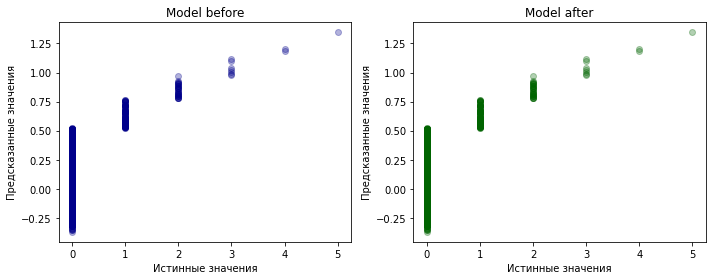

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

#Диаграмма рассеивания истинных и предсказанных значений для модели до шифрования данных
ax1.scatter(y_test, predictions_before, color="DarkBlue", alpha=0.3)
ax1.set_title("Model before")
ax1.set_xlabel("Истинные значения")
ax1.set_ylabel("Предсказанные значения")


# Диаграмма рассеивания истинных и предсказанных значений для модели после шифрования данных
ax2.scatter(y_test, predictions_after, color="DarkGreen", alpha=0.3)
ax2.set_title("Model after")
ax2.set_xlabel("Истинные значения")
ax2.set_ylabel("Предсказанные значения")

plt.tight_layout()
plt.show()
